In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset 
train1 = pd.read_csv('Titanic.csv')
train1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#diamension of dataset
train.shape

(418, 11)

In [4]:
#description of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
#find out missing values
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#drop cabin column
train.drop(['Cabin'],axis=1,inplace=True)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:xlabel='Parch', ylabel='count'>

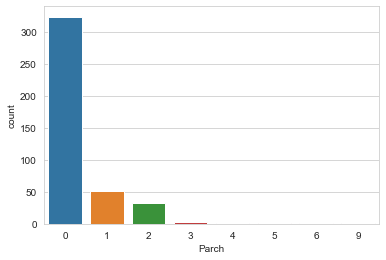

In [7]:
#visualization charts
sns.set_style('whitegrid')
sns.countplot(x= 'Parch',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

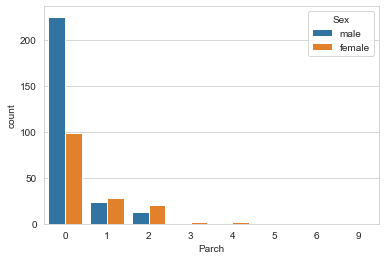

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Sex',data=train)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Parch', ylabel='count'>

<AxesSubplot:>

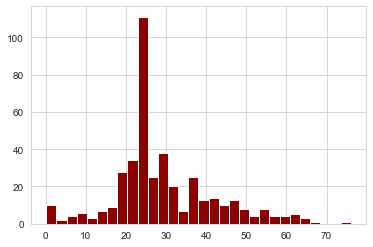

In [25]:
train['Age'].hist(bins=30,color='darkred',alpha=1.0)

<AxesSubplot:>

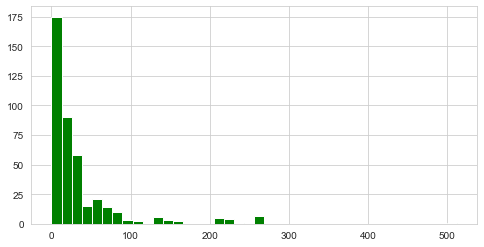

In [26]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [28]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)


In [29]:
train['Embarked']=train['Embarked'].fillna('s')

In [ ]:
#and drop tables
'''
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
S = pd.get_dummies(train['S'],drop_first=True)
s = pd.get_dummies(train['s'],drop_first=True)
male = pd.get_dummies(train['male'],drop_first=True)
train.head()'''

In [30]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
#drop na from all dataset
train.dropna(inplace=True)

In [32]:
#training the machine by 90% of data and testing on that

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=train['Parch']
y=train['Sex']
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [36]:
#increse Diamensions of the data
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]
logmodel.fit(X_train,y_train)

<ipython-input-36-bf076518a626>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=X_train[:,np.newaxis]
<ipython-input-36-bf076518a626>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test=X_test[:,np.newaxis]


LogisticRegression()

In [37]:
predictions=logmodel.predict(X_test)
predictions

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male'], dtype=object)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 7 35]
 [ 5 58]]
